# Eksamen Økonometri A

**eksamennumre:** 25, 36, 9

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Opgave 1

### Opgave 1.a

In [137]:
# Læs CSV-fil
df = pd.read_csv('cars.csv')

# Brug .describe() og formater værdierne
describe_df = df.describe(percentiles=[]).T  # Transponér for bedre oversigt

# Runder tallene i beskrivelsen til f.eks. to decimaler
describe_df.map(lambda x: f"{x:.4f}")


,count,mean,std,min,50%,max
year,9694.0000,2001.0968,11.0770,1980.0000,2002.0000,2018.0000
product_id,9694.0000,486.6750,278.9975,0.0000,512.0000,1066.0000
sales,9694.0000,59103.3910,86940.2541,10.0000,27394.0000,891482.0000
number_households,9694.0000,107213264.9061,13932786.2775,80780000.0000,109300000.0000,127590000.0000
price,9694.0000,36.0477,17.1266,11.1448,31.8202,99.9864
height,9694.0000,60.9481,8.4115,43.5000,57.7000,107.5000
footprint,9694.0000,13392.6300,1968.9152,6514.5400,13330.0640,21821.8590
weight,9694.0000,3561.2111,897.7655,1113.0000,3470.5000,8550.0000
hp,9694.0000,192.1820,83.8824,44.0000,175.0000,645.0000
mpg,9694.0000,20.9362,6.5830,10.0000,19.0000,50.0000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

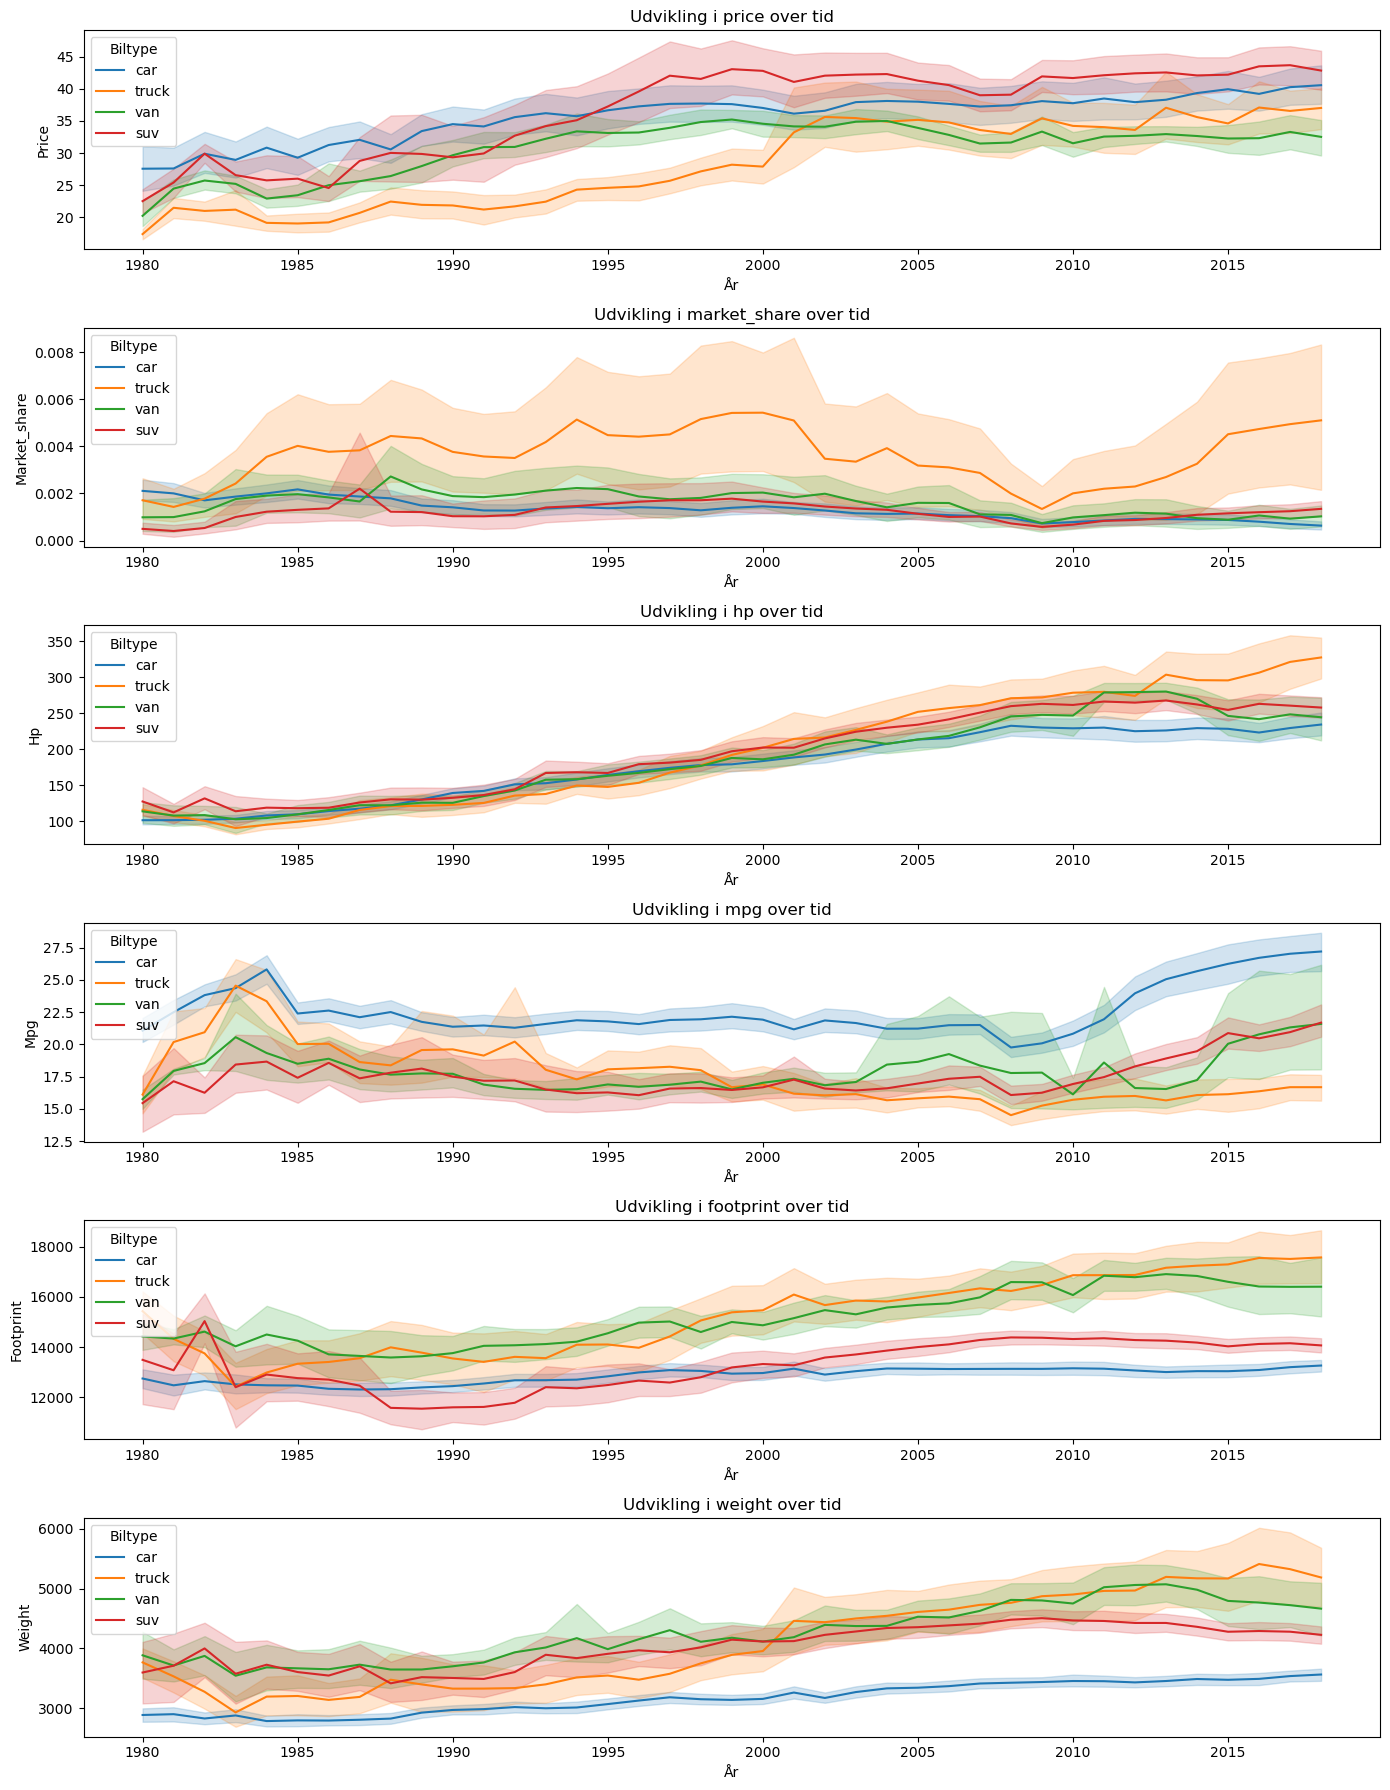

In [138]:

df['car_type'] = df[['car', 'suv', 'truck', 'van']].idxmax(axis=1)

# Liste over de variabler, vi vil plotte over tid
attributes = ['price', 'market_share', 'hp', 'mpg', 'footprint', 'weight']

# Opret figurer med underplots for hver variabel
plt.figure(figsize=(14, 18))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(len(attributes), 1, i)
    sns.lineplot(data=df, x='year', y=attribute, hue= df.car_type)  # 'car_type' bør være navnet på biltypekolonnen
    plt.title(f"Udvikling i {attribute} over tid")
    plt.xlabel("År")
    plt.ylabel(attribute.capitalize())
    plt.legend(title='Biltype')

plt.tight_layout()
plt.show()

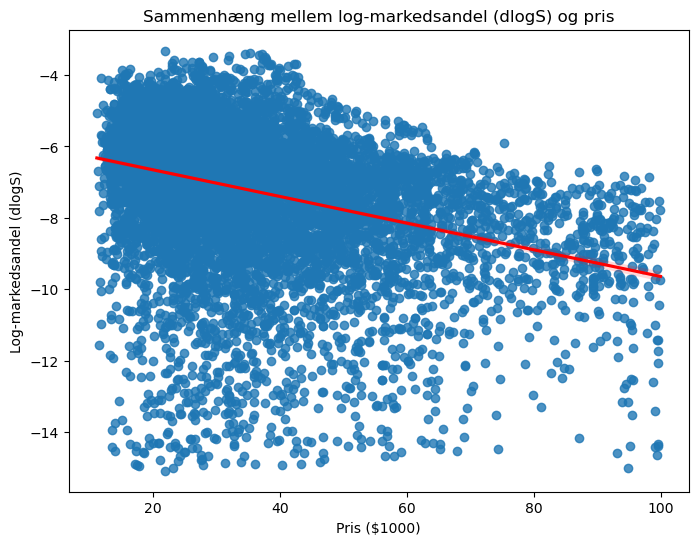

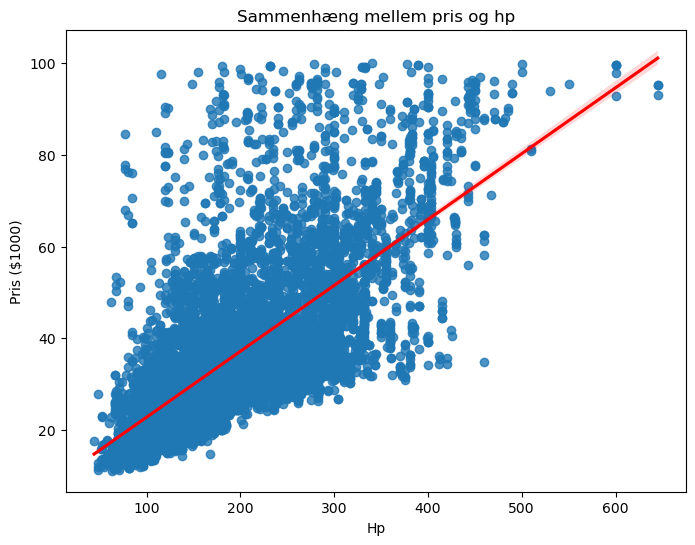

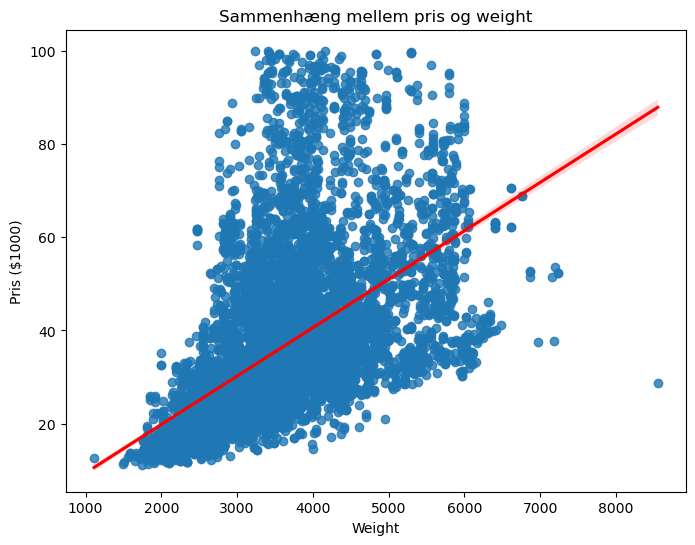

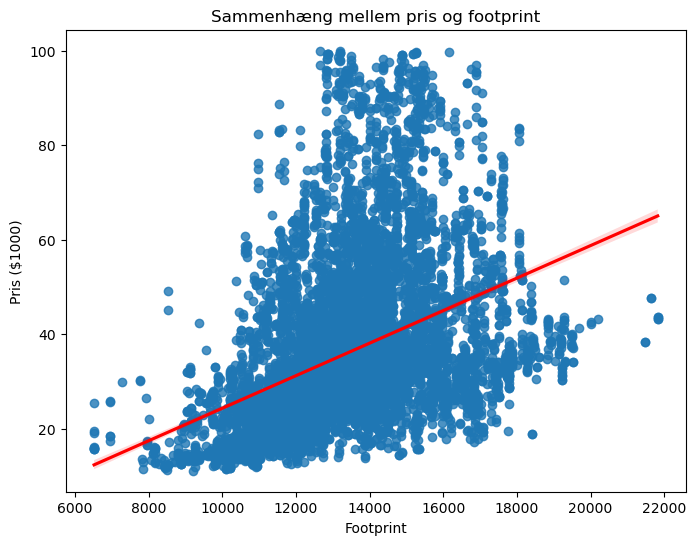

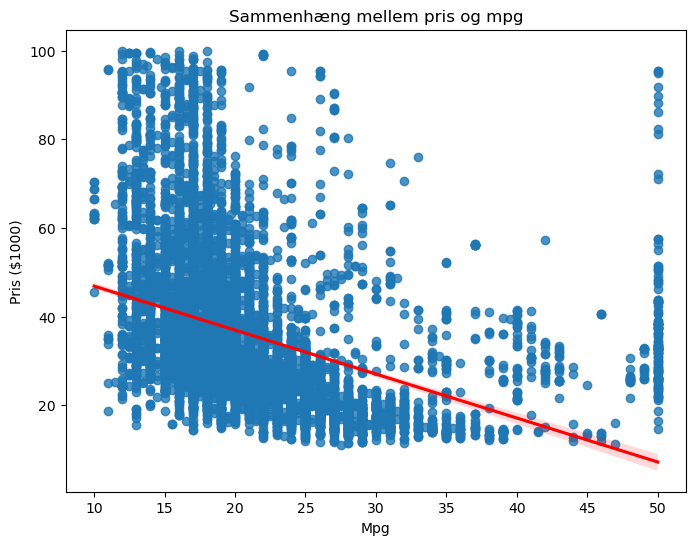

Regression mellem dlogS og price:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          1.30e-238
Time:                        14:15:09   Log-Likelihood:                -19742.
No. Observations:                9694   AIC:                         3.949e+04
Df Residuals:                    9692   BIC:                         3.950e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9

In [139]:
# 1. Scatter plot mellem dlogS og price med regressionslinje
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='price', y='dlogS', line_kws={"color": "red"})
plt.title("Sammenhæng mellem log-markedsandel (dlogS) og pris")
plt.xlabel("Pris ($1000)")
plt.ylabel("Log-markedsandel (dlogS)")
plt.show()

# 2. Scatter plots mellem price og fysiske attributter med regressionslinjer
attributes = ['hp', 'weight', 'footprint', 'mpg']

for attribute in attributes:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=attribute, y='price', line_kws={"color": "red"})
    plt.title(f"Sammenhæng mellem pris og {attribute}")
    plt.xlabel(attribute.capitalize())
    plt.ylabel("Pris ($1000)")
    plt.show()

# 3. Regressionsanalyser
# Regressionsmodel for dlogS som funktion af price
X = df[['price']]
X = sm.add_constant(X)  # Tilføj konstantled til regressionsmodellen
y = df['dlogS']
model = sm.OLS(y, X).fit()
print("Regression mellem dlogS og price:")
print(model.summary())

# Regressionsmodeller for price som funktion af de fysiske attributter
for attribute in attributes:
    X = df[[attribute]]
    X = sm.add_constant(X)
    y = df['price']
    model = sm.OLS(y, X).fit()
    print(f"\nRegression mellem price og {attribute}:")
    print(model.summary())

### Opgave 1.b


In [140]:
df = pd.read_csv('cars.csv')

# Dummy-variabler for år
df = pd.get_dummies(df, columns=['year'], drop_first=True)

# Liste over kontinuerte attributter i modellen (oprindelig skala) og biltype-dummies
attributes2 = ['hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign', 'price', 'van', 'suv', 'truck', 'sport', 'EV']
# Dummy kolonner for år
dummies = [col for col in df.columns if 'year_' in col]  # Dummy kolonner for år
# Samlet liste over forklarende variabler i den oprindelige skala
explanatory_vars = attributes2 + dummies

# Opret formel dynamisk for den oprindelige skala model
formula = 'dlogS ~ ' + ' + '.join(explanatory_vars)

# Estimer OLS-modellen (oprindelige skala) med heteroskedasticitetsrobuste standardfejl (HC1)
model = smf.ols(formula=formula, data=df)
results = model.fit(cov_type='HC1')

# Print resultater for modellen med oprindelige skala
print("Model med oprindelige skala:")
print(results.summary())

# Beregn TSS, ESS, RSS, og R² for den oprindelige skala model
tss = np.sum((df['dlogS'] - df['dlogS'].mean())**2)
rss = np.sum(results.resid**2)
ess = tss - rss
r_squared = results.rsquared

print(f"TSS: {tss}, ESS: {ess}, RSS: {rss}, R²: {r_squared}")

Model med oprindelige skala:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     89.92
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:15:10   Log-Likelihood:                -18265.
No. Observations:                9694   AIC:                         3.664e+04
Df Residuals:                    9641   BIC:                         3.702e+04
Df Model:                          52                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept

In [141]:
df['log_hp'] = np.log(df['hp'])
df['log_mpg'] = np.log(df['mpg'])
df['log_height'] = np.log(df['height'])
df['log_footprint'] = np.log(df['footprint'])
df['log_weight'] = np.log(df['weight'])
df['log_number_trims'] = np.log(df['number_trims'] + 1)  # For at undgå log(0)

# Liste over log-transformerede variabler
log_attributes = ['log_hp', 'log_mpg', 'log_height', 'log_footprint', 'log_weight', 'log_number_trims']
# Samlet liste over forklarende variabler med log-transformerede variabler
explanatory_vars_log = log_attributes + ['price'] + dummies

# Opret formel dynamisk for log-transformeret model
formula_log = 'dlogS ~ ' + ' + '.join(explanatory_vars_log)

# Estimer OLS-modellen (log-transformation) med heteroskedasticitetsrobuste standardfejl (HC1)
model_log = smf.ols(formula=formula_log, data=df)
results_log = model_log.fit(cov_type='HC1')

# Print resultater for modellen med log-transformationer
print("\nModel med log-transformationer:")
print(results_log.summary())

# Beregn TSS, ESS, RSS, og R² for log-transformeret model
rss_log = np.sum(results_log.resid**2)
ess_log = tss - rss_log  # Brug samme TSS som i første model
r_squared_log = results_log.rsquared

print(f"TSS: {tss}, ESS: {ess_log}, RSS: {rss_log}, R²: {r_squared_log}")


Model med log-transformationer:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     147.2
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:15:10   Log-Likelihood:                -17560.
No. Observations:                9694   AIC:                         3.521e+04
Df Residuals:                    9648   BIC:                         3.554e+04
Df Model:                          45                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Inter

### Opgave 1.c

In [142]:
# Udtræk t-statistik og p-værdi for priskoefficienten
alpha_t_stat = results.tvalues['price']
alpha_p_value = results.pvalues['price']

print(f"T-statistik for alpha (price): {alpha_t_stat}")
print(f"P-værdi for alpha (price): {alpha_p_value}")

T-statistik for alpha (price): -21.818086320829178
P-værdi for alpha (price): 1.5626279598576105e-105


# Opgave 2

### Opgave 2.a

In [143]:
# Læs CSV-fil
df = pd.read_csv('cars.csv')

# Dummy-variabler for år og biltyper
df = pd.get_dummies(df, columns=['year'], drop_first=True)

# Liste over kontinuerte attributter i modellen (oprindelig skala) og biltype-dummies
attributes2 = ['hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign', 'price', 'van', 'suv', 'truck', 'sport', 'EV']
dummies = [col for col in df.columns if 'year_' in col]  # Dummy kolonner for år
explanatory_vars = attributes2 + dummies

# Tilføj bilmærke-specifikke dummies (make)
formula_with_make_dummies = 'dlogS ~ ' + ' + '.join(explanatory_vars) + ' + C(make)'

# Estimer OLS-modellen med bilmærke-specifikke dummies og heteroskedasticitetsrobuste standardfejl (HC1)
model_with_make_dummies = smf.ols(formula=formula_with_make_dummies, data=df)
results_with_make_dummies = model_with_make_dummies.fit(cov_type='HC1')

# Print resultater for modellen med bilmærke-specifikke dummies
print("Model med bilmærke-specifikke dummies:")
print(results_with_make_dummies.summary())

Model med bilmærke-specifikke dummies:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     7138.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:15:10   Log-Likelihood:                -17502.
No. Observations:                9694   AIC:                         3.523e+04
Df Residuals:                    9580   BIC:                         3.605e+04
Df Model:                         113                                         
Covariance Type:                  HC1                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 113, but rank is 109
  warnings.warn('covariance of constraints does not have full '


In [144]:
# Definer within-transformationen
def within(df, group_var, vars_to_transform):
    df_within = df.copy()
    for var in vars_to_transform:
        df_within[var] = df[var] - df.groupby(group_var)[var].transform('mean')
    return df_within

# Liste over variabler til within-transformation (kontinuerte variabler)
within_vars = ['dlogS', 'price', 'hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign']

# Anvend within-make transformation på de valgte variabler
df_within = within(df, 'make', within_vars)

# Opret formel for within-modellen uden C(make) og uden konstantleddet
formula_within = 'dlogS ~ ' + ' + '.join(within_vars[1:] + dummies) + ' - 1'  # '- 1' fjerner konstantleddet

# Estimer OLS-modellen efter within-transformationen uden konstantleddet og med HC1
model_within = smf.ols(formula=formula_within, data=df_within)
results_within = model_within.fit(cov_type='HC1')

# Print resultaterne for modellen efter within-transformationen
print("\nModel efter within-transformation:")
print(results_within.summary())



Model efter within-transformation:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                nan
Time:                        14:15:10   Log-Likelihood:                -17773.
No. Observations:                9694   AIC:                         3.564e+04
Df Residuals:                    9646   BIC:                         3.599e+04
Df Model:                          47                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ye

### Opgave 2.b

In [145]:
# Model fra opgave 1B uden make-specifikke effekter
formula_1B = 'dlogS ~ ' + ' + '.join(explanatory_vars)
model_1B = smf.ols(formula=formula_1B, data=df)
results_1B = model_1B.fit(cov_type='HC1')
print("Model fra opgave 1B uden make-specifikke effekter:")
print(results_1B.summary())

# Gem resultatet af model 1B som LaTeX
with open("model_1B.tex", "w") as f:
    f.write(results_1B.summary2().as_latex())

# Model fra opgave 2A med make-specifikke effekter (C(make) for bilmærke-specifikke dummies)
formula_2A = 'dlogS ~ ' + ' + '.join(explanatory_vars) + ' + C(make)'
model_2A = smf.ols(formula=formula_2A, data=df)
results_2A = model_2A.fit(cov_type='HC1')
print("\nModel fra opgave 2A med make-specifikke effekter:")
print(results_2A.summary())

# Gem resultatet af model 2A som LaTeX
with open("model_2A.tex", "w") as f:
    f.write(results_2A.summary2().as_latex())

Model fra opgave 1B uden make-specifikke effekter:
                            OLS Regression Results                            
Dep. Variable:                  dlogS   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     89.92
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:15:10   Log-Likelihood:                -18265.
No. Observations:                9694   AIC:                         3.664e+04
Df Residuals:                    9641   BIC:                         3.702e+04
Df Model:                          52                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 113, but rank is 109
  warnings.warn('covariance of constraints does not have full '


### Opgave 2.c

In [146]:
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

# Fjern specialtegn og mellemrum fra kolonnenavne for at undgå fejl i formlen
df.columns = [col.replace(" ", "_").replace("-", "_").replace("/", "_") for col in df.columns]

# Definer produktkarakteristika og dummy variabler
product_characteristics = ['hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign']
time_make_dummies = [col for col in df.columns if 'year_' in col or 'make_' in col]
explanatory_vars = product_characteristics + time_make_dummies

### Første trin: Estimering af pris som funktion af RXR og kontroller ###

# Formel for første trin: price som funktion af RXR og andre forklarende variabler
formula_first_stage = 'price ~ RXR + ' + ' + '.join(explanatory_vars)
first_stage_model = smf.ols(formula=formula_first_stage, data=df)
first_stage_results = first_stage_model.fit()

# Udskriv resultater og t-test for koefficienten for RXR
print("First Stage Regression (price ~ RXR + product characteristics + time and make dummies):")
print(first_stage_results.summary())

First Stage Regression (price ~ RXR + product characteristics + time and make dummies):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     433.8
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:15:11   Log-Likelihood:                -35787.
No. Observations:                9694   AIC:                         7.167e+04
Df Residuals:                    9646   BIC:                         7.201e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [147]:
### Andet trin: Estimer efterspørgselsligning med 2SLS ###

# Formel for 2SLS: dlogS som funktion af price (instrumenteret af RXR) og kontroller
formula_2sls = 'dlogS ~ 1 + [' + 'price ~ RXR' + '] + ' + ' + '.join(explanatory_vars)
model_2sls = IV2SLS.from_formula(formula_2sls, data=df)
results_2sls = model_2sls.fit()

# Udskriv resultaterne for 2SLS
print("\n2SLS Regression (dlogS ~ price instrumenteret af RXR):")
print(results_2sls)


2SLS Regression (dlogS ~ price instrumenteret af RXR):
                          IV-2SLS Estimation Summary                          
Dep. Variable:                  dlogS   R-squared:                      0.0826
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0781
No. Observations:                9694   F-statistic:                    2718.6
Date:                Fri, Nov 01 2024   P-value (F-stat)                0.0000
Time:                        14:15:11   Distribution:                 chi2(47)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
Intercept           -3.9743     0.5880    -6.7590     0.0

# Opgave 3

### Opgave 3.a

In [159]:
# Funktion til at beregne Gandhi og Houde-instrumenterne
def gh_iv(df, characteristics):
    df_iv = df.copy()
    for char in characteristics:
        df_iv[char] = df_iv.groupby('year')[char].transform(lambda x: x / x.std())
        df_iv[f'gh_iv_{char}'] = df_iv.groupby('year').apply(
            lambda group: group[char].apply(lambda x: ((group[char] - x).abs() < group[char].std()).sum())
        ).reset_index(level=0, drop=True)
    return df_iv[[f'gh_iv_{char}' for char in characteristics]]

In [163]:
# Definer produktkarakteristika og dummy-variabler
product_characteristics = ['hp', 'mpg', 'height', 'footprint', 'weight', 'number_trims', 'releaseYear', 'yearsSinceDesign']
time_make_dummies = [col for col in df.columns if 'year_' in col or 'make_' in col]
explanatory_vars = product_characteristics + time_make_dummies

# Læs CSV-fil
df = pd.read_csv('cars.csv')

# Beregn Gandhi og Houde-instrumenterne én gang
gh_instruments = gh_iv(df, product_characteristics)  # Antag at denne funktion er defineret i 2.c

# Tilføj de nye instrumenter til datasættet og fjern 'year', hvis den ikke længere er nødvendig
df = pd.concat([df, gh_instruments], axis=1).drop(columns=['year'], errors='ignore')

# Opdater instrumentlisten til 2SLS-modellen med både RXR og GH-instrumenterne
instruments = ['RXR'] + list(gh_instruments.columns)

# Formel til 2SLS-estimering med både RXR og GH-instrumenterne
formula_2sls_with_gh = 'dlogS ~ 1 + [' + 'price ~ ' + ' + '.join(instruments) + '] + ' + ' + '.join(explanatory_vars)

# Estimer den nye 2SLS-model med både RXR og GH-instrumenter
model_2sls_with_gh = IV2SLS.from_formula(formula_2sls_with_gh, data=df)
results_2sls_with_gh = model_2sls_with_gh.fit()

# Print resultaterne for 2SLS med de udvidede instrumenter
print("2SLS Regression (dlogS ~ price instrumenteret af RXR og GH-instrumenter):")
print(results_2sls_with_gh)

# Udfør en overidentifikationstest for at vurdere instrumenternes validitet
overid_test = results_2sls_with_gh.wooldridge_overid
print("\nOveridentifikationstest (Wooldridge):")
print(f"Test-statistik: {overid_test.statistic}, p-værdi: {overid_test.pval}")


2SLS Regression (dlogS ~ price instrumenteret af RXR og GH-instrumenter):
                          IV-2SLS Estimation Summary                          
Dep. Variable:                  dlogS   R-squared:                      0.2467
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2460
No. Observations:                9694   F-statistic:                    2519.8
Date:                Fri, Nov 01 2024   P-value (F-stat)                0.0000
Time:                        14:37:19   Distribution:                  chi2(9)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
Intercept           -8.0543     0.3586 

AttributeError: 'WaldTestStatistic' object has no attribute 'statistic'